# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company wants to understand the factors on which the demand for these shared bikes depends. 

Essentially, the company wants  —

 To Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands




- To identify the variables predicting the demand of shared bikes , e.g. season,weather etc.

- To create a linear model that quantitatively relates demand pf shared bikes with variables such as season,weather etc.

- To know the accuracy of the model, i.e. how well these variables can predict the demand of shared bikes.

**So interpretation is important!**



### Import libraries

In [721]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler



### Reading/Insepcting data

In [722]:
Bike_rent_data = pd.read_csv("day.csv")

In [723]:
Bike_rent_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [724]:
Bike_rent_data.shape

(730, 16)

In [725]:
Bike_rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Date column is in object format.This has to be converted to date format.


In [726]:
# Statistical summary of numerical variables in the data set
Bike_rent_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [727]:
# Check values in the column to confirm if there are any odd values.
Bike_rent_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [728]:

Bike_rent_data.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [729]:
Bike_rent_data.mnth.value_counts()


12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [730]:
Bike_rent_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [731]:
Bike_rent_data.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

#### As per the analysis 0 appears to be sunday here

In [732]:
Bike_rent_data.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

#### working day and holiday seems to capture same data

In [733]:
Bike_rent_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Cleaning and Preparing data


  Handling null values 
    - There are no null values in the data set
    
  Renaming column names for better readability
    - yr,mnth,cnt,hum,temp,atemp are renamed for better readbility
   
  Converting data to correct format<br>
    - dteday field is converted to pandas datetime format

  Delete rows and columns<br>
    - instant: This column appears to be an index
    - casual & registered: These columns contain redundant data for 'cnt' and are co-related with each other.
    - dteday as year month and weekday contributes the same
  
  Encoding:
    - Numerical variables to categorical strings<br>
        The data set contains columns seasons and weathersit which has numerical values 1,2,3,4.
        This has corresponding labels associated with them in data dictionary. For better readability and analysis there   
        variables are converted into labels as per data dictionary.
        Month will replaced with name and yr will be replaced with 2018 for 0, 2019 for 1
        weekday will be replaced with names
    - Binary categorical variables "yes"/"no" should be converted into 1 and 0<br>
        Data set doesn't have categorical yes and no columns.
    - If there are categorical variables with 'n' levels create n-1 dummy variables<br>
        Dummy variables are created for weather and season.

In [734]:
# Rename columns for better understanding
Bike_rent_data.rename(columns = {'yr':'Year', 'mnth':'Month', 
                              'temp':'Temparature','atemp':'Feeling Temperature','hum':'Humidity','cnt':'Count'}, inplace = True) 

In [735]:
# Converting dteday to pandas datetime format
Bike_rent_data['dteday'] = pd.to_datetime(Bike_rent_data['dteday'],format = '%d-%m-%Y')

In [736]:
# Converting numerical values to categorical string
def map_season(x):
    if x == 1:
        return('spring')
    if x == 2:
        return('summer')
    if x == 3:
        return('fall')
    if x == 4:
        return('winter')
    
Bike_rent_data['season'] = Bike_rent_data['season'].apply(lambda x:map_season(x))
Bike_rent_data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [737]:
# Converting Year to 2018 and 2019 for 0 and 1 respectively
Bike_rent_data['Year'] = Bike_rent_data['Year'].apply(lambda x: 2018 if x == 0 else 2019)
Bike_rent_data['Year'].value_counts()


2019    365
2018    365
Name: Year, dtype: int64

In [738]:
# Converting Month to Month names
Month_name = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
Bike_rent_data['Month'] = Bike_rent_data['Month'].map(Month_name)
Bike_rent_data['Month'].value_counts()

Mar    62
Jan    62
Oct    62
May    62
Dec    62
Jul    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: Month, dtype: int64

In [739]:
Bike_rent_data['holiday'] = Bike_rent_data['holiday'].apply(lambda x: 'Hday' if x == 1 else 'NHday')
Bike_rent_data['holiday'].value_counts()

NHday    709
Hday      21
Name: holiday, dtype: int64

In [740]:
Day_name = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'}
Bike_rent_data['weekday'] = Bike_rent_data['weekday'].map(Day_name)
Bike_rent_data['weekday'].value_counts()

Tue    105
Mon    105
Wed    104
Fri    104
Sun    104
Thu    104
Sat    104
Name: weekday, dtype: int64

In [741]:
Day_codes= {1:'Wday',0:'NWday'}
Bike_rent_data['workingday'] = Bike_rent_data['workingday'].map(Day_codes)
Bike_rent_data['workingday'].value_counts()

Wday     504
NWday    226
Name: workingday, dtype: int64

In [742]:
# Converting weathersit to appropriate month names
def map_weathersit(x):
    if x == 1:
        return('Clear')
    if x == 2:
        return('Misty')
    if x == 3:
        return('Light Snow')
    if x == 4:
        return('Heavy Rain')


    
Bike_rent_data['weathersit'] = Bike_rent_data['weathersit'].apply(lambda x:map_weathersit(x))

In [743]:
Bike_rent_data.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,weathersit,Temparature,Feeling Temperature,Humidity,windspeed,casual,registered,Count
0,1,2018-01-01,spring,2018,Jan,NHday,Mon,Wday,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,Jan,NHday,Tue,Wday,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,Jan,NHday,Wed,Wday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,Jan,NHday,Thu,Wday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,Jan,NHday,Fri,Wday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [744]:
Bike_rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              730 non-null    int64         
 1   dteday               730 non-null    datetime64[ns]
 2   season               730 non-null    object        
 3   Year                 730 non-null    int64         
 4   Month                730 non-null    object        
 5   holiday              730 non-null    object        
 6   weekday              730 non-null    object        
 7   workingday           730 non-null    object        
 8   weathersit           730 non-null    object        
 9   Temparature          730 non-null    float64       
 10  Feeling Temperature  730 non-null    float64       
 11  Humidity             730 non-null    float64       
 12  windspeed            730 non-null    float64       
 13  casual               730 non-null  

In [745]:
# drop the columns
Bike_rent_data.drop(['instant','dteday'],axis = 1,inplace=True)


### Quantitative analysis for bike demand monthwise for each year


In [746]:
res = pd.pivot_table(Bike_rent_data,index = 'Month',columns = 'Year',values = 'Count',aggfunc = sum)
res


Year,2018,2019
Month,,
Apr,94870,174224
Aug,136691,214503
Dec,87323,123713
Feb,48215,101303
Jan,38189,96744
Jul,141341,203607
Jun,143512,202830
Mar,64045,164875
May,135821,195865


### Visualisation of categorical vs numeric data


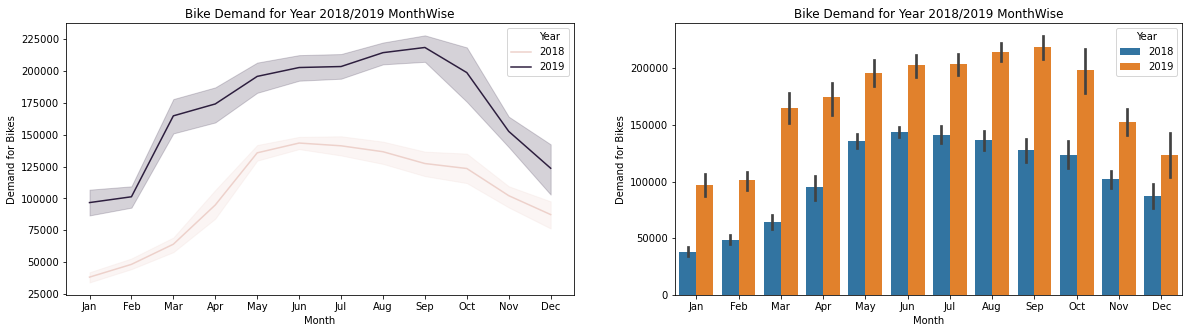

In [747]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.lineplot('Month','Count',hue='Year',data=Bike_rent_data,estimator = sum,sort = False).set_title("Bike Demand for Year 2018/2019 MonthWise")
plt.xlabel('Month')
plt.ylabel('Demand for Bikes')

plt.subplot(1,2,2)
sns.barplot('Month','Count',hue='Year',data=Bike_rent_data,estimator = sum).set_title("Bike Demand for Year 2018/2019 MonthWise")
plt.xlabel('Month')
plt.ylabel('Demand for Bikes')

plt.show()


#### Compared to 2018, there is an increase in the demand for bikes in 2019.Graphs shows the dip in the bike demands towards the beginning and end of the year(This may be because of winter season).

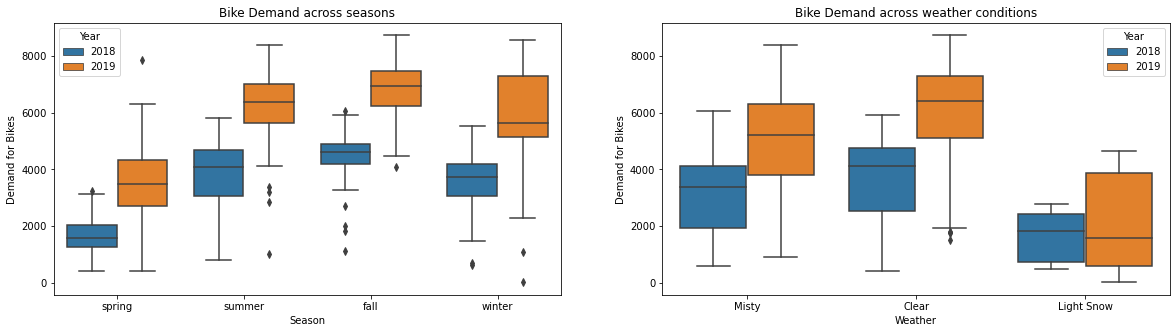

In [748]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'Count',hue = 'Year', data = Bike_rent_data).set_title("Bike Demand across seasons")
plt.xlabel('Season')
plt.ylabel('Demand for Bikes')

plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'Count',hue = 'Year', data = Bike_rent_data).set_title("Bike Demand across weather conditions")
plt.xlabel('Weather')
plt.ylabel('Demand for Bikes')
plt.show()

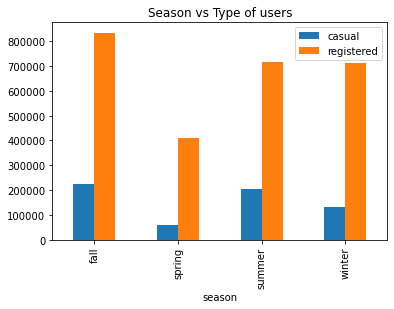

In [749]:
# Types of users across seasons
res = Bike_rent_data.groupby(['season'])['casual','registered'].sum()
res.plot(kind='bar')
plt.title('Season vs Type of users')
plt.show()

#### Overall demand is high in fall season. There are outliers in the data, which indicates that there are very less bookings on certain days during summer/winter and fall seasons
#### Bike demands are more during clear weater. As the outlier indicates there are very less bookings on certain days during clear weather conditions also.Bike Demand are less during snowy seasons.

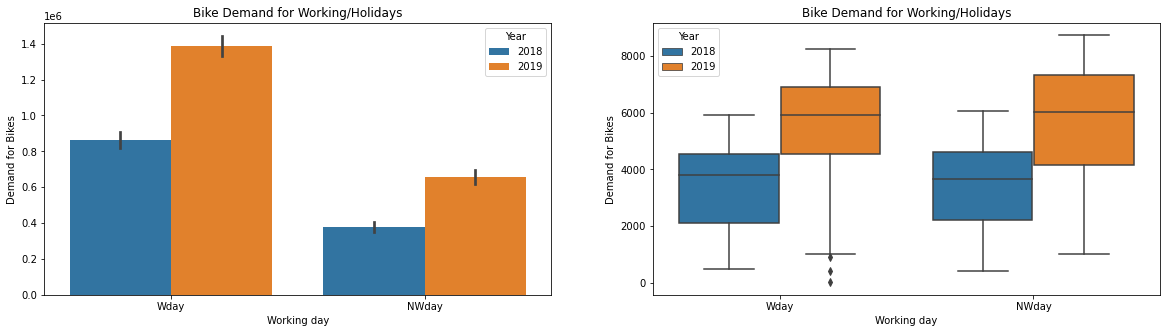

In [750]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.barplot('workingday','Count',hue = 'Year',data=Bike_rent_data,estimator = sum).set_title("Bike Demand for Working/Holidays")
plt.xlabel('Working day')
plt.ylabel('Demand for Bikes')

plt.subplot(1,2,2)
sns.boxplot(x = 'workingday', y = 'Count',hue = 'Year',data = Bike_rent_data,).set_title("Bike Demand for Working/Holidays")
plt.xlabel('Working day')
plt.ylabel('Demand for Bikes')
plt.show()

#### Demand is more on working days.There are some outliers in the data which shows that there are less demands on certain working days also.

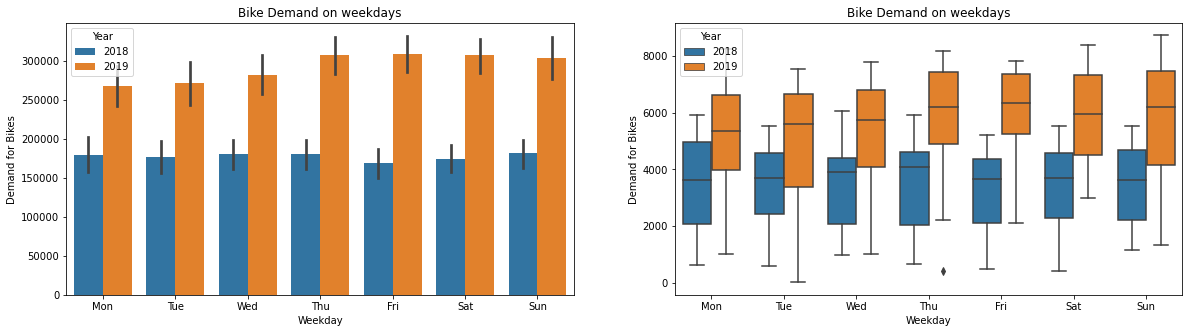

In [751]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.barplot('weekday','Count',hue = 'Year',data=Bike_rent_data,estimator = sum).set_title("Bike Demand on weekdays")
plt.xlabel('Weekday')
plt.ylabel('Demand for Bikes')


plt.subplot(1,2,2)
sns.boxplot(x = 'weekday', y = 'Count',hue = 'Year',data = Bike_rent_data,).set_title("Bike Demand on weekdays")
plt.xlabel('Weekday')
plt.ylabel('Demand for Bikes')
plt.show()

#### Weekly statistics shows a less demand on Monday,Tuesday and Wednesday

### Visualisation of numeric data

Bike_rent_data.describe

In [752]:
Bike_rent_data.describe()

,Year,Temparature,Feeling Temperature,Humidity,windspeed,casual,registered,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2018.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2018.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,2018.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,2019.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,2019.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


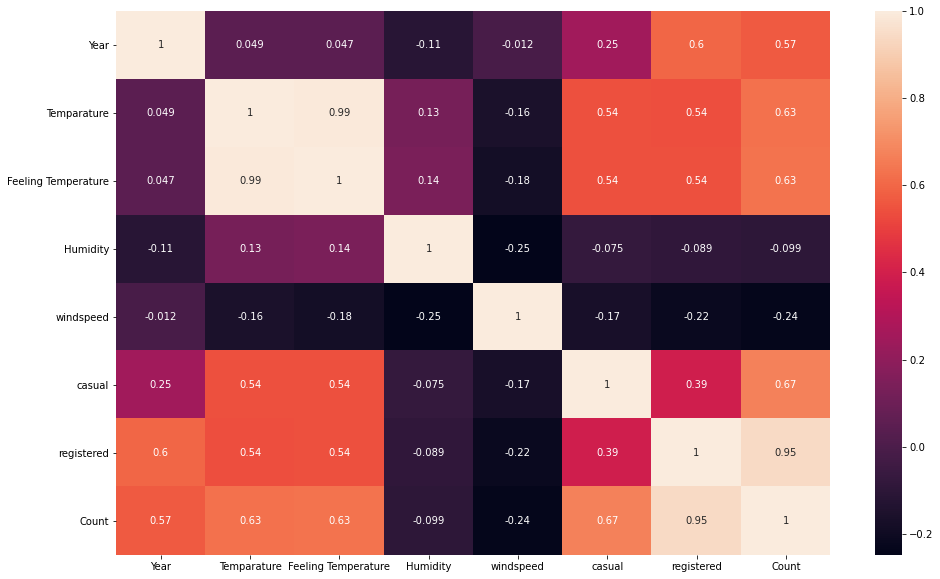

In [753]:
plt.figure(figsize = [16,10])
sns.heatmap(Bike_rent_data.corr(),annot =  True)
plt.show()

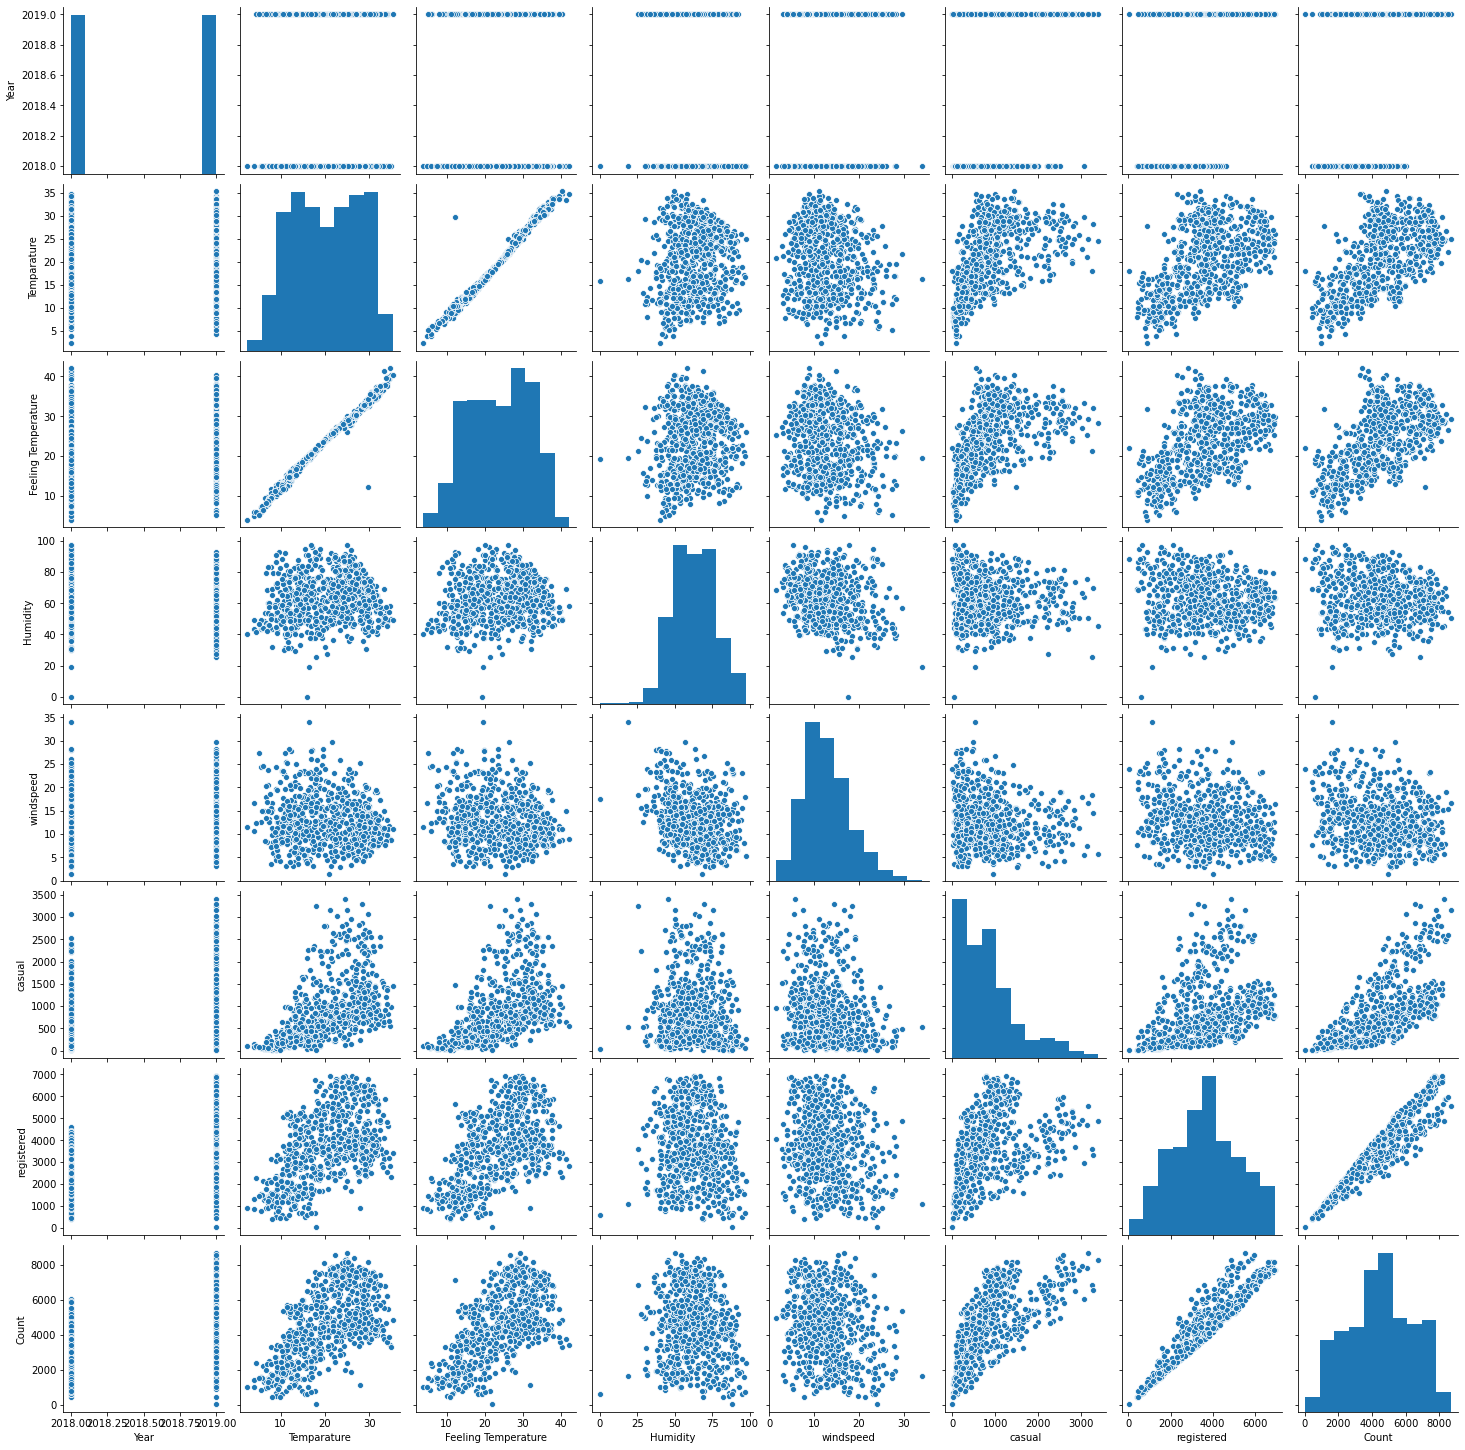

In [754]:
sns.pairplot(Bike_rent_data)
plt.show()

#### Bike demands have linear relationship with variables like temperature.
#### Casual and registered have some corelation with each other.Hence its advisable to drop those since it may otherwise result in multicollinearity. This seems to be redundant data which is in target columns.
#### Temperature and Feeling Temperature are also highly corelated with each other, hence its advisable to drop one to avoid multicollinearity
#### Count(Bike demand)  is negatively corelated with windspeed. Which means Demand for bike decreases as windspeed increases or viceversa
#### Since target variable is a continous variable and have are corelation with some of the independent variable Linear regression can be done here


In [755]:
# drop the column casual,registered as it appears to be highly corelated.
Bike_rent_data.drop(['casual','registered','Feeling Temperature'],axis = 1,inplace=True)

In [756]:
Bike_rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   Year         730 non-null    int64  
 2   Month        730 non-null    object 
 3   holiday      730 non-null    object 
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    object 
 6   weathersit   730 non-null    object 
 7   Temparature  730 non-null    float64
 8   Humidity     730 non-null    float64
 9   windspeed    730 non-null    float64
 10  Count        730 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 62.9+ KB


### Create Dummy variables

In [757]:
# create dummy variables for categorical columns
df_categorical = Bike_rent_data.select_dtypes(exclude=['float64','datetime64','int64'])
df_categorical


,season,Month,holiday,weekday,workingday,weathersit
0,spring,Jan,NHday,Mon,Wday,Misty
1,spring,Jan,NHday,Tue,Wday,Misty
2,spring,Jan,NHday,Wed,Wday,Clear
3,spring,Jan,NHday,Thu,Wday,Clear
4,spring,Jan,NHday,Fri,Wday,Clear
...,...,...,...,...,...,...
725,spring,Dec,NHday,Fri,Wday,Misty
726,spring,Dec,NHday,Sat,NWday,Misty
727,spring,Dec,NHday,Sun,NWday,Misty
728,spring,Dec,NHday,Mon,Wday,Clear


In [758]:
Dummy_vars = pd.get_dummies(df_categorical,drop_first = True)
Dummy_vars

,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
0,1,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
726,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0


In [759]:
Bike_rent_data = pd.concat([Bike_rent_data,Dummy_vars],axis = 1)
Bike_rent_data.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,Temparature,Humidity,windspeed,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
0,spring,2018,Jan,NHday,Mon,Wday,Misty,14.110847,80.5833,10.749882,...,1,1,0,0,0,0,0,1,0,1
1,spring,2018,Jan,NHday,Tue,Wday,Misty,14.902598,69.6087,16.652113,...,1,0,0,0,0,1,0,1,0,1
2,spring,2018,Jan,NHday,Wed,Wday,Clear,8.050924,43.7273,16.636703,...,1,0,0,0,0,0,1,1,0,0
3,spring,2018,Jan,NHday,Thu,Wday,Clear,8.200000,59.0435,10.739832,...,1,0,0,0,1,0,0,1,0,0
4,spring,2018,Jan,NHday,Fri,Wday,Clear,9.305237,43.6957,12.522300,...,1,0,0,0,0,0,0,1,0,0


In [760]:
Bike_rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 730 non-null    object 
 1   Year                   730 non-null    int64  
 2   Month                  730 non-null    object 
 3   holiday                730 non-null    object 
 4   weekday                730 non-null    object 
 5   workingday             730 non-null    object 
 6   weathersit             730 non-null    object 
 7   Temparature            730 non-null    float64
 8   Humidity               730 non-null    float64
 9   windspeed              730 non-null    float64
 10  Count                  730 non-null    int64  
 11  season_spring          730 non-null    uint8  
 12  season_summer          730 non-null    uint8  
 13  season_winter          730 non-null    uint8  
 14  Month_Aug              730 non-null    uint8  
 15  Month_

In [761]:
Bike_rent_data.drop(['season','Month','holiday','weekday','workingday','weathersit'],axis = 1,inplace = True)
Bike_rent_data.head()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
0,2018,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
1,2018,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,2018,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,2018,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,2018,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [762]:
Bike_rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   730 non-null    int64  
 1   Temparature            730 non-null    float64
 2   Humidity               730 non-null    float64
 3   windspeed              730 non-null    float64
 4   Count                  730 non-null    int64  
 5   season_spring          730 non-null    uint8  
 6   season_summer          730 non-null    uint8  
 7   season_winter          730 non-null    uint8  
 8   Month_Aug              730 non-null    uint8  
 9   Month_Dec              730 non-null    uint8  
 10  Month_Feb              730 non-null    uint8  
 11  Month_Jan              730 non-null    uint8  
 12  Month_Jul              730 non-null    uint8  
 13  Month_Jun              730 non-null    uint8  
 14  Month_Mar              730 non-null    uint8  
 15  Month_

### Split data into train and test split

In [763]:
import sklearn
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(Bike_rent_data,train_size = 0.7,test_size = 0.3,random_state = 100)

In [764]:
df_train.shape

(510, 29)

In [765]:
df_test.shape

(219, 29)

In [766]:
df_train.head()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
653,2019,19.201653,55.8333,12.208807,7534,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
576,2019,29.246653,70.4167,11.083475,7216,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
426,2019,16.980847,62.1250,10.792293,4066,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
728,2019,10.489153,48.3333,23.500518,1796,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
482,2019,15.443347,48.9583,8.708325,4220,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [767]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    int64  
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   Count                  510 non-null    int64  
 5   season_spring          510 non-null    uint8  
 6   season_summer          510 non-null    uint8  
 7   season_winter          510 non-null    uint8  
 8   Month_Aug              510 non-null    uint8  
 9   Month_Dec              510 non-null    uint8  
 10  Month_Feb              510 non-null    uint8  
 11  Month_Jan              510 non-null    uint8  
 12  Month_Jul              510 non-null    uint8  
 13  Month_Jun              510 non-null    uint8  
 14  Month_Mar              510 non-null    uint8  
 15  Month

### Re-Scaling

In [768]:
# check out for the numeric variables to scale
Bike_rent_data.describe()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,...,0.971233,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.690411,0.028767,0.336986
std,0.500343,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,...,0.167266,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.462641,0.167266,0.473004
min,2018.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.500000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2019.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [769]:
# rescale numeric data using min-max scaler so that all numeric columns are in same units
num_vars = ['Year','Temparature','Humidity','windspeed','Count']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [770]:
df_train.head()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
653,1.0,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
576,1.0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
426,1.0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
728,1.0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
482,1.0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [771]:
df_train.describe()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,...,0.974510,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.343137
std,0.500429,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,...,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### After recaling values are within 0 and 1 with minimum as 0 and maximum as 1.

### Dividing into X and Y sets for the model building.
     - y_train is the predictor variable, which is Count here
     - X_train is the independent variables

In [772]:
y_train = df_train.pop('Count')
X_train = df_train

In [773]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: Count, dtype: float64

In [774]:
X_train.head()

,Year,Temparature,Humidity,windspeed,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
653,1.0,0.509887,0.575354,0.300794,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
576,1.0,0.815169,0.725633,0.264686,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
426,1.0,0.442393,0.640189,0.255342,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
728,1.0,0.245101,0.498067,0.663106,1,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
482,1.0,0.395666,0.504508,0.188475,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


## Model 1: Building a linear model using backward approach
     - y_train is the predictor variable, which is Count here
     - X_train is the independent variables
     - In this approach all the variables will be used as the predictor variables(excluding target).After model building 
       significance of each variable and its multicollinearity will be evaluated.Based on these 2 factors will decide which 
       variable has to be eliminated. R-Sqaure and F-Statistics will also be evaluated.
     

In [775]:
X_train_lm = sm.add_constant(X_train)
X_train_lm

,const,Year,Temparature,Humidity,windspeed,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
653,1.0,1.0,0.509887,0.575354,0.300794,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
576,1.0,1.0,0.815169,0.725633,0.264686,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
426,1.0,1.0,0.442393,0.640189,0.255342,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
728,1.0,1.0,0.245101,0.498067,0.663106,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
482,1.0,1.0,0.395666,0.504508,0.188475,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1.0,0.824514,0.605840,0.355596,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
578,1.0,1.0,0.863973,0.679690,0.187140,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
53,1.0,0.0,0.202618,0.435939,0.111379,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
350,1.0,0.0,0.248216,0.577930,0.431816,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,1


In [776]:
lm = sm.OLS(y_train,X_train_lm).fit()


In [777]:
lm.params

const                    0.259119
Year                     0.230857
Temparature              0.445458
Humidity                -0.157315
windspeed               -0.183046
season_spring           -0.043705
season_summer            0.042243
season_winter            0.110897
Month_Aug                0.021507
Month_Dec               -0.045669
Month_Feb               -0.037279
Month_Jan               -0.063612
Month_Jul               -0.034910
Month_Jun                0.000975
Month_Mar                0.000608
Month_May                0.024064
Month_Nov               -0.041555
Month_Oct                0.005790
Month_Sep                0.086055
holiday_NHday            0.135424
weekday_Mon             -0.024633
weekday_Sat             -0.056319
weekday_Sun             -0.049961
weekday_Thu              0.003863
weekday_Tue             -0.026299
weekday_Wed             -0.011241
workingday_Wday         -0.060524
weathersit_Light Snow   -0.251511
weathersit_Misty        -0.059355
dtype: float64

In [778]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.33e-179
Time:                        17:47:35   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2591      0.054      4.796      0.000       0.153       0.365
Year                      0.2309      0.008     28.387      0.000       0.215       0.247
Temparature               0.4455      0.047      9.513      0.000       0.353       0.537
Humidity                 -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
Month_Aug                 0.0215      0.034      0.632      0.527      -0.045       0.088
Month_Dec                -0.0457      0.034     -1.348      0.178      -0.112       0.021
Month_Feb                -0.0373      0.033     -1.121      0.263      -0.103       0.028
Month_Jan                -0.0636      0.034     -1.880      0.061      -0.130       0.003
Month_Jul                -0.0349      0.035     -0.985      0.325      -0.105       0.035
Month_Jun                 0.0010      0.025      0.038      0.969      -0.049       0.051
Month_Mar                 0.0006      0.025      0.025      0.980      -0.048       0.049
Month_May                 0.0241      0.021      1.134      0.257      -0.018       0.066
Month_Nov                -0.0416      0.037     -1.133      0.258      -0.114       0.031
Month_Oct                 0.0058      0.036      0.160      0.873      -0.065       0.077
Month_Sep                 0.0861      0.032      2.667      0.008       0.023       0.149
holiday_NHday             0.1354      0.065      2.072      0.039       0.007       0.264
weekday_Mon              -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_Sat              -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_Sun              -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_Thu               0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_Tue              -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_Wed              -0.0112      0.015     -0.736      0.462      -0.041       0.019
workingday_Wday          -0.0605      0.071     -0.852      0.395      -0.200       0.079
weathersit_Light Snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Misty         -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

#### R-Square is .850(85%), which is pretty good.But there are lot of variables with very high P-Value.  A high P-Value indicates that variable is not significant.

#### There are variables with negative co-efficients.This seems to be correct. As  december,jan have less demands for bikes.Winspeed also have a negative co-relation with bike demand. Snowy and misty days have less demands for bike.

#### Lets see Multicollinearity also.

In [779]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif


,features,VIF
18,holiday_NHday,266.67
25,workingday_Wday,217.91
21,weekday_Sun,41.94
20,weekday_Sat,39.72
2,Humidity,39.39
1,Temparature,38.92
4,season_spring,12.53
6,season_winter,12.26
5,season_summer,8.15
16,Month_Oct,6.55



#### VIF is very high for many variables.Some of these variables havelow p-values.

#### In this  approach will drop the variables with high P-Value since variables with high p-value are less significant and will parallely check VIF also.

#### Drop variable "Month_Mar" and re-build the model

In [780]:
X_train = X_train.drop('Month_Mar',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Aug              510 non-null    uint8  
 8   Month_Dec              510 non-null    uint8  
 9   Month_Feb              510 non-null    uint8  
 10  Month_Jan              510 non-null    uint8  
 11  Month_Jul              510 non-null    uint8  
 12  Month_Jun              510 non-null    uint8  
 13  Month_May              510 non-null    uint8  
 14  Month_Nov              510 non-null    uint8  
 15  Month

In [781]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
#lm.params

In [782]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.24e-180
Time:                        17:47:36   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2595      0.052      5.023      0.000       0.158       0.361
Year                      0.2309      0.008     28.416      0.000       0.215       0.247
Temparature               0.4453      0.046      9.653      0.000       0.355       0.536
Humidity                 -0.1572      0.039     -4.064      0.000      -0.233      -0.081
windspeed                -0.1831      0.026     -7.052      0.000      -0.234      -0.132
season_spring            -0.0435      0.029     -1.519      0.130      -0.100       0.013
season_summer             0.0421      0.026      1.625      0.105      -0.009       0.093
season_winter             0.1110      0.028      4.016      0.000       0.057       0.165
Month_Aug                 0.0212      0.032      0.662      0.508      -0.042       0.084
Month_Dec                -0.0462      0.026     -1.762      0.079      -0.098       0.005
Month_Feb                -0.0379      0.022     -1.687      0.092      -0.082       0.006
Month_Jan                -0.0642      0.023     -2.852      0.005      -0.108      -0.020
Month_Jul                -0.0352      0.034     -1.041      0.298      -0.102       0.031
Month_Jun                 0.0008      0.024      0.032      0.974      -0.046       0.048
Month_May                 0.0239      0.020      1.204      0.229      -0.015       0.063
Month_Nov                -0.0420      0.031     -1.354      0.176      -0.103       0.019
Month_Oct                 0.0053      0.031      0.173      0.863      -0.055       0.066
Month_Sep                 0.0857      0.029      2.924      0.004       0.028       0.143
holiday_NHday             0.1354      0.065      2.074      0.039       0.007       0.264
weekday_Mon              -0.0247      0.015     -1.695      0.091      -0.053       0.004
weekday_Sat              -0.0563      0.072     -0.788      0.431      -0.197       0.084
weekday_Sun              -0.0499      0.071     -0.699      0.485      -0.190       0.090
weekday_Thu               0.0039      0.015      0.259      0.796      -0.025       0.033
weekday_Tue              -0.0263      0.015     -1.796      0.073      -0.055       0.002
weekday_Wed              -0.0112      0.015     -0.737      0.461      -0.041       0.019
workingday_Wday          -0.0605      0.071     -0.853      0.394      -0.200       0.079
weathersit_Light Snow    -0.2515      0.027     -9.465      0.000      -0.304      -0.199
weathersit_Misty         -0.0594      0.011     -5.643      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.874   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.108
Skew:                          -0.768   Prob(JB):       

#### R-Sqaure still remain the same.Check for multicollinearity

In [783]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
17,holiday_NHday,266.67
24,workingday_Wday,216.57
20,weekday_Sun,41.61
19,weekday_Sat,39.45
1,Temparature,38.83
2,Humidity,38.14
6,season_winter,11.49
4,season_spring,9.76
5,season_summer,8.13
7,Month_Aug,5.97


#### There is no much change in VIF. Drop June based on high P-Value and rebuild the model

In [784]:
X_train = X_train.drop('Month_Jun',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Aug              510 non-null    uint8  
 8   Month_Dec              510 non-null    uint8  
 9   Month_Feb              510 non-null    uint8  
 10  Month_Jan              510 non-null    uint8  
 11  Month_Jul              510 non-null    uint8  
 12  Month_May              510 non-null    uint8  
 13  Month_Nov              510 non-null    uint8  
 14  Month_Oct              510 non-null    uint8  
 15  Month

In [785]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params

const                    0.259580
Year                     0.230829
Temparature              0.446066
Humidity                -0.157372
windspeed               -0.183159
season_spring           -0.043759
season_summer            0.041902
season_winter            0.110860
Month_Aug                0.020585
Month_Dec               -0.046266
Month_Feb               -0.037820
Month_Jan               -0.064118
Month_Jul               -0.035867
Month_May                0.023580
Month_Nov               -0.042186
Month_Oct                0.005081
Month_Sep                0.085209
holiday_NHday            0.135409
weekday_Mon             -0.024630
weekday_Sat             -0.056260
weekday_Sun             -0.049891
weekday_Thu              0.003841
weekday_Tue             -0.026311
weekday_Wed             -0.011254
workingday_Wday         -0.060447
weathersit_Light Snow   -0.251496
weathersit_Misty        -0.059346
dtype: float64

In [786]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.08e-181
Time:                        17:47:36   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     483   BIC:                            -879.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2596      0.052      5.035      0.000       0.158       0.361
Year                      0.2308      0.008     28.587      0.000       0.215       0.247
Temparature               0.4461      0.039     11.449      0.000       0.370       0.523
Humidity                 -0.1574      0.038     -4.095      0.000      -0.233      -0.082
windspeed                -0.1832      0.026     -7.097      0.000      -0.234      -0.132
season_spring            -0.0438      0.027     -1.613      0.107      -0.097       0.010
season_summer             0.0419      0.025      1.675      0.095      -0.007       0.091
season_winter             0.1109      0.027      4.084      0.000       0.058       0.164
Month_Aug                 0.0206      0.025      0.820      0.413      -0.029       0.070
Month_Dec                -0.0463      0.026     -1.773      0.077      -0.098       0.005
Month_Feb                -0.0378      0.022     -1.692      0.091      -0.082       0.006
Month_Jan                -0.0641      0.022     -2.885      0.004      -0.108      -0.020
Month_Jul                -0.0359      0.026     -1.378      0.169      -0.087       0.015
Month_May                 0.0236      0.018      1.346      0.179      -0.011       0.058
Month_Nov                -0.0422      0.031     -1.376      0.169      -0.102       0.018
Month_Oct                 0.0051      0.030      0.170      0.865      -0.054       0.064
Month_Sep                 0.0852      0.025      3.466      0.001       0.037       0.134
holiday_NHday             0.1354      0.065      2.076      0.038       0.007       0.264
weekday_Mon              -0.0246      0.015     -1.697      0.090      -0.053       0.004
weekday_Sat              -0.0563      0.071     -0.788      0.431      -0.197       0.084
weekday_Sun              -0.0499      0.071     -0.700      0.485      -0.190       0.090
weekday_Thu               0.0038      0.015      0.258      0.797      -0.025       0.033
weekday_Tue              -0.0263      0.015     -1.798      0.073      -0.055       0.002
weekday_Wed              -0.0113      0.015     -0.739      0.461      -0.041       0.019
workingday_Wday          -0.0604      0.071     -0.853      0.394      -0.200       0.079
weathersit_Light Snow    -0.2515      0.027     -9.475      0.000      -0.304      -0.199
weathersit_Misty         -0.0593      0.011     -5.652      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.804   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.608
Skew:                          -0.768   Prob(JB):                     5.03e-46
Kurtosis:                       5.731   Cond. No.                  

##### No change in R-Square. Checking for multicollinearity

In [787]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
16,holiday_NHday,266.66
23,workingday_Wday,216.21
19,weekday_Sun,41.55
18,weekday_Sat,39.39
2,Humidity,37.79
1,Temparature,24.63
6,season_winter,11.12
4,season_spring,8.65
5,season_summer,7.54
3,windspeed,5.26


###  Drop October based on high p-value and rebuild the model

In [788]:
X_train = X_train.drop('Month_Oct',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Aug              510 non-null    uint8  
 8   Month_Dec              510 non-null    uint8  
 9   Month_Feb              510 non-null    uint8  
 10  Month_Jan              510 non-null    uint8  
 11  Month_Jul              510 non-null    uint8  
 12  Month_May              510 non-null    uint8  
 13  Month_Nov              510 non-null    uint8  
 14  Month_Sep              510 non-null    uint8  
 15  holid

In [789]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params

const                    0.261170
Year                     0.230799
Temparature              0.445500
Humidity                -0.156546
windspeed               -0.182869
season_spring           -0.044407
season_summer            0.040441
season_winter            0.113345
Month_Aug                0.019253
Month_Dec               -0.049422
Month_Feb               -0.038785
Month_Jan               -0.065121
Month_Jul               -0.037144
Month_May                0.023585
Month_Nov               -0.046261
Month_Sep                0.083214
holiday_NHday            0.135371
weekday_Mon             -0.024515
weekday_Sat             -0.056575
weekday_Sun             -0.050262
weekday_Thu              0.003897
weekday_Tue             -0.026312
weekday_Wed             -0.011189
workingday_Wday         -0.060858
weathersit_Light Snow   -0.251409
weathersit_Misty        -0.059421
dtype: float64

In [790]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.90e-182
Time:                        17:47:36   Log-Likelihood:                 523.79
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2612      0.051      5.157      0.000       0.162       0.361
Year                      0.2308      0.008     28.619      0.000       0.215       0.247
Temparature               0.4455      0.039     11.488      0.000       0.369       0.522
Humidity                 -0.1565      0.038     -4.110      0.000      -0.231      -0.082
windspeed                -0.1829      0.026     -7.108      0.000      -0.233      -0.132
season_spring            -0.0444      0.027     -1.655      0.099      -0.097       0.008
season_summer             0.0404      0.023      1.722      0.086      -0.006       0.087
season_winter             0.1133      0.023      4.959      0.000       0.068       0.158
Month_Aug                 0.0193      0.024      0.808      0.419      -0.028       0.066
Month_Dec                -0.0494      0.018     -2.696      0.007      -0.085      -0.013
Month_Feb                -0.0388      0.022     -1.795      0.073      -0.081       0.004
Month_Jan                -0.0651      0.021     -3.042      0.002      -0.107      -0.023
Month_Jul                -0.0371      0.025     -1.492      0.136      -0.086       0.012
Month_May                 0.0236      0.017      1.348      0.178      -0.011       0.058
Month_Nov                -0.0463      0.019     -2.421      0.016      -0.084      -0.009
Month_Sep                 0.0832      0.022      3.855      0.000       0.041       0.126
holiday_NHday             0.1354      0.065      2.078      0.038       0.007       0.263
weekday_Mon              -0.0245      0.014     -1.693      0.091      -0.053       0.004
weekday_Sat              -0.0566      0.071     -0.793      0.428      -0.197       0.084
weekday_Sun              -0.0503      0.071     -0.706      0.481      -0.190       0.090
weekday_Thu               0.0039      0.015      0.262      0.794      -0.025       0.033
weekday_Tue              -0.0263      0.015     -1.800      0.073      -0.055       0.002
weekday_Wed              -0.0112      0.015     -0.735      0.463      -0.041       0.019
workingday_Wday          -0.0609      0.071     -0.860      0.390      -0.200       0.078
weathersit_Light Snow    -0.2514      0.027     -9.483      0.000      -0.303      -0.199
weathersit_Misty         -0.0594      0.010     -5.670      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.293   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.411
Skew:                          -0.764   Prob(JB):                     1.51e-45
Kurtosis:                       5.716   Cond. No.                         70.2
==============================================================================

#### There is no change in the R-square.Check for multicollinearity

In [791]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
15,holiday_NHday,266.66
22,workingday_Wday,216.18
18,weekday_Sun,41.53
17,weekday_Sat,39.37
2,Humidity,36.29
1,Temparature,24.63
4,season_spring,8.62
6,season_winter,6.99
5,season_summer,6.88
3,windspeed,5.18


#### Drop thursday based on high p-value and rebuild again

In [792]:
X_train = X_train.drop('weekday_Thu',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Aug              510 non-null    uint8  
 8   Month_Dec              510 non-null    uint8  
 9   Month_Feb              510 non-null    uint8  
 10  Month_Jan              510 non-null    uint8  
 11  Month_Jul              510 non-null    uint8  
 12  Month_May              510 non-null    uint8  
 13  Month_Nov              510 non-null    uint8  
 14  Month_Sep              510 non-null    uint8  
 15  holid

In [793]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params

const                    0.263133
Year                     0.230866
Temparature              0.445279
Humidity                -0.156795
windspeed               -0.182950
season_spring           -0.044424
season_summer            0.040658
season_winter            0.113583
Month_Aug                0.019483
Month_Dec               -0.049737
Month_Feb               -0.038613
Month_Jan               -0.065166
Month_Jul               -0.036700
Month_May                0.023693
Month_Nov               -0.046448
Month_Sep                0.083342
holiday_NHday            0.135360
weekday_Mon             -0.026433
weekday_Sat             -0.058335
weekday_Sun             -0.052044
weekday_Tue             -0.028255
weekday_Wed             -0.013103
workingday_Wday         -0.060711
weathersit_Light Snow   -0.252062
weathersit_Misty        -0.059505
dtype: float64

In [794]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.71e-183
Time:                        17:47:36   Log-Likelihood:                 523.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     485   BIC:                            -891.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2631      0.050      5.258      0.000       0.165       0.361
Year                      0.2309      0.008     28.669      0.000       0.215       0.247
Temparature               0.4453      0.039     11.496      0.000       0.369       0.521
Humidity                 -0.1568      0.038     -4.122      0.000      -0.232      -0.082
windspeed                -0.1830      0.026     -7.118      0.000      -0.233      -0.132
season_spring            -0.0444      0.027     -1.657      0.098      -0.097       0.008
season_summer             0.0407      0.023      1.734      0.083      -0.005       0.087
season_winter             0.1136      0.023      4.978      0.000       0.069       0.158
Month_Aug                 0.0195      0.024      0.819      0.413      -0.027       0.066
Month_Dec                -0.0497      0.018     -2.722      0.007      -0.086      -0.014
Month_Feb                -0.0386      0.022     -1.790      0.074      -0.081       0.004
Month_Jan                -0.0652      0.021     -3.047      0.002      -0.107      -0.023
Month_Jul                -0.0367      0.025     -1.479      0.140      -0.085       0.012
Month_May                 0.0237      0.017      1.356      0.176      -0.011       0.058
Month_Nov                -0.0464      0.019     -2.435      0.015      -0.084      -0.009
Month_Sep                 0.0833      0.022      3.866      0.000       0.041       0.126
holiday_NHday             0.1354      0.065      2.080      0.038       0.007       0.263
weekday_Mon              -0.0264      0.012     -2.118      0.035      -0.051      -0.002
weekday_Sat              -0.0583      0.071     -0.822      0.411      -0.198       0.081
weekday_Sun              -0.0520      0.071     -0.735      0.463      -0.191       0.087
weekday_Tue              -0.0283      0.013     -2.245      0.025      -0.053      -0.004
weekday_Wed              -0.0131      0.013     -0.983      0.326      -0.039       0.013
workingday_Wday          -0.0607      0.071     -0.859      0.391      -0.200       0.078
weathersit_Light Snow    -0.2521      0.026     -9.560      0.000      -0.304      -0.200
weathersit_Misty         -0.0595      0.010     -5.686      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.598   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.793
Skew:                          -0.766   Prob(JB):                     7.56e-46
Kurtosis:                       5.726   Cond. No.                         69.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [795]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
15,holiday_NHday,266.65
21,workingday_Wday,215.73
18,weekday_Sun,41.39
17,weekday_Sat,39.24
2,Humidity,36.26
1,Temparature,24.54
4,season_spring,8.57
6,season_winter,6.91
5,season_summer,6.78
3,windspeed,5.18


#### Drop weekday_Sun based on high p-valueand rebuild

In [796]:
X_train = X_train.drop('weekday_Sun',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Aug              510 non-null    uint8  
 8   Month_Dec              510 non-null    uint8  
 9   Month_Feb              510 non-null    uint8  
 10  Month_Jan              510 non-null    uint8  
 11  Month_Jul              510 non-null    uint8  
 12  Month_May              510 non-null    uint8  
 13  Month_Nov              510 non-null    uint8  
 14  Month_Sep              510 non-null    uint8  
 15  holid

In [797]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params

const                    0.253457
Year                     0.231212
Temparature              0.446132
Humidity                -0.155664
windspeed               -0.183462
season_spring           -0.044108
season_summer            0.040742
season_winter            0.113338
Month_Aug                0.019128
Month_Dec               -0.049478
Month_Feb               -0.038224
Month_Jan               -0.064934
Month_Jul               -0.037090
Month_May                0.023383
Month_Nov               -0.047709
Month_Sep                0.083472
holiday_NHday            0.092353
weekday_Mon             -0.025876
weekday_Sat             -0.007428
weekday_Tue             -0.027423
weekday_Wed             -0.011787
workingday_Wday         -0.009666
weathersit_Light Snow   -0.251889
weathersit_Misty        -0.059492
dtype: float64

In [798]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.37e-184
Time:                        17:47:36   Log-Likelihood:                 523.47
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     486   BIC:                            -897.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2535      0.048      5.252      0.000       0.159       0.348
Year                      0.2312      0.008     28.775      0.000       0.215       0.247
Temparature               0.4461      0.039     11.529      0.000       0.370       0.522
Humidity                 -0.1557      0.038     -4.098      0.000      -0.230      -0.081
windspeed                -0.1835      0.026     -7.144      0.000      -0.234      -0.133
season_spring            -0.0441      0.027     -1.646      0.100      -0.097       0.009
season_summer             0.0407      0.023      1.739      0.083      -0.005       0.087
season_winter             0.1133      0.023      4.970      0.000       0.069       0.158
Month_Aug                 0.0191      0.024      0.805      0.421      -0.028       0.066
Month_Dec                -0.0495      0.018     -2.710      0.007      -0.085      -0.014
Month_Feb                -0.0382      0.022     -1.773      0.077      -0.081       0.004
Month_Jan                -0.0649      0.021     -3.038      0.003      -0.107      -0.023
Month_Jul                -0.0371      0.025     -1.496      0.135      -0.086       0.012
Month_May                 0.0234      0.017      1.339      0.181      -0.011       0.058
Month_Nov                -0.0477      0.019     -2.512      0.012      -0.085      -0.010
Month_Sep                 0.0835      0.022      3.874      0.000       0.041       0.126
holiday_NHday             0.0924      0.028      3.244      0.001       0.036       0.148
weekday_Mon              -0.0259      0.012     -2.078      0.038      -0.050      -0.001
weekday_Sat              -0.0074      0.015     -0.487      0.626      -0.037       0.023
weekday_Tue              -0.0274      0.013     -2.189      0.029      -0.052      -0.003
weekday_Wed              -0.0118      0.013     -0.893      0.373      -0.038       0.014
workingday_Wday          -0.0097      0.013     -0.744      0.457      -0.035       0.016
weathersit_Light Snow    -0.2519      0.026     -9.558      0.000      -0.304      -0.200
weathersit_Misty         -0.0595      0.010     -5.687      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.549   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.045
Skew:                          -0.771   Prob(JB):                     4.92e-45
Kurtosis:                       5.687   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [799]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
2,Humidity,36.13
15,holiday_NHday,36.08
1,Temparature,24.17
4,season_spring,8.41
20,workingday_Wday,7.73
6,season_winter,6.76
5,season_summer,6.65
3,windspeed,5.12
7,Month_Aug,3.28
11,Month_Jul,2.90


#### Drop Wednesday based on high p-value  and rebuild. There is a drastic decrease in the VIF value for holiday. 

In [800]:
X_train = X_train.drop('weekday_Sat',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Aug              510 non-null    uint8  
 8   Month_Dec              510 non-null    uint8  
 9   Month_Feb              510 non-null    uint8  
 10  Month_Jan              510 non-null    uint8  
 11  Month_Jul              510 non-null    uint8  
 12  Month_May              510 non-null    uint8  
 13  Month_Nov              510 non-null    uint8  
 14  Month_Sep              510 non-null    uint8  
 15  holid

In [801]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params

const                    0.253249
Year                     0.231328
Temparature              0.445782
Humidity                -0.155689
windspeed               -0.183175
season_spring           -0.044550
season_summer            0.040443
season_winter            0.113113
Month_Aug                0.018797
Month_Dec               -0.049315
Month_Feb               -0.037972
Month_Jan               -0.064948
Month_Jul               -0.037090
Month_May                0.023283
Month_Nov               -0.048218
Month_Sep                0.083289
holiday_NHday            0.089268
weekday_Mon             -0.025858
weekday_Tue             -0.027409
weekday_Wed             -0.011713
workingday_Wday         -0.006055
weathersit_Light Snow   -0.252424
weathersit_Misty        -0.059368
dtype: float64

In [802]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.32e-185
Time:                        17:47:36   Log-Likelihood:                 523.35
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2532      0.048      5.252      0.000       0.159       0.348
Year                      0.2313      0.008     28.824      0.000       0.216       0.247
Temparature               0.4458      0.039     11.531      0.000       0.370       0.522
Humidity                 -0.1557      0.038     -4.101      0.000      -0.230      -0.081
windspeed                -0.1832      0.026     -7.141      0.000      -0.234      -0.133
season_spring            -0.0445      0.027     -1.665      0.097      -0.097       0.008
season_summer             0.0404      0.023      1.728      0.085      -0.006       0.086
season_winter             0.1131      0.023      4.965      0.000       0.068       0.158
Month_Aug                 0.0188      0.024      0.792      0.429      -0.028       0.065
Month_Dec                -0.0493      0.018     -2.703      0.007      -0.085      -0.013
Month_Feb                -0.0380      0.022     -1.764      0.078      -0.080       0.004
Month_Jan                -0.0649      0.021     -3.041      0.002      -0.107      -0.023
Month_Jul                -0.0371      0.025     -1.497      0.135      -0.086       0.012
Month_May                 0.0233      0.017      1.335      0.183      -0.011       0.058
Month_Nov                -0.0482      0.019     -2.545      0.011      -0.085      -0.011
Month_Sep                 0.0833      0.022      3.869      0.000       0.041       0.126
holiday_NHday             0.0893      0.028      3.218      0.001       0.035       0.144
weekday_Mon              -0.0259      0.012     -2.078      0.038      -0.050      -0.001
weekday_Tue              -0.0274      0.013     -2.190      0.029      -0.052      -0.003
weekday_Wed              -0.0117      0.013     -0.888      0.375      -0.038       0.014
workingday_Wday          -0.0061      0.011     -0.568      0.571      -0.027       0.015
weathersit_Light Snow    -0.2524      0.026     -9.594      0.000      -0.304      -0.201
weathersit_Misty         -0.0594      0.010     -5.682      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       77.413   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.812
Skew:                          -0.761   Prob(JB):                     2.48e-44
Kurtosis:                       5.671   Cond. No.                         32.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [803]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
2,Humidity,36.13
15,holiday_NHday,33.45
1,Temparature,24.15
4,season_spring,8.40
6,season_winter,6.76
5,season_summer,6.64
19,workingday_Wday,5.20
3,windspeed,5.11
7,Month_Aug,3.28
11,Month_Jul,2.90


#### Drop workingday_WorkingDay based on high p-value and rebuild

In [804]:
X_train = X_train.drop('workingday_Wday',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Aug              510 non-null    uint8  
 8   Month_Dec              510 non-null    uint8  
 9   Month_Feb              510 non-null    uint8  
 10  Month_Jan              510 non-null    uint8  
 11  Month_Jul              510 non-null    uint8  
 12  Month_May              510 non-null    uint8  
 13  Month_Nov              510 non-null    uint8  
 14  Month_Sep              510 non-null    uint8  
 15  holid

In [805]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.36e-186
Time:                        17:47:36   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     488   BIC:                            -909.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2558      0.048      5.333      0.000       0.162       0.350
Year                      0.2314      0.008     28.848      0.000       0.216       0.247
Temparature               0.4457      0.039     11.537      0.000       0.370       0.522
Humidity                 -0.1568      0.038     -4.138      0.000      -0.231      -0.082
windspeed                -0.1832      0.026     -7.146      0.000      -0.234      -0.133
season_spring            -0.0442      0.027     -1.654      0.099      -0.097       0.008
season_summer             0.0406      0.023      1.737      0.083      -0.005       0.087
season_winter             0.1135      0.023      4.987      0.000       0.069       0.158
Month_Aug                 0.0192      0.024      0.810      0.418      -0.027       0.066
Month_Dec                -0.0491      0.018     -2.694      0.007      -0.085      -0.013
Month_Feb                -0.0383      0.022     -1.780      0.076      -0.081       0.004
Month_Jan                -0.0650      0.021     -3.044      0.002      -0.107      -0.023
Month_Jul                -0.0364      0.025     -1.472      0.142      -0.085       0.012
Month_May                 0.0232      0.017      1.331      0.184      -0.011       0.057
Month_Nov                -0.0488      0.019     -2.582      0.010      -0.086      -0.012
Month_Sep                 0.0836      0.022      3.886      0.000       0.041       0.126
holiday_NHday             0.0837      0.026      3.227      0.001       0.033       0.135
weekday_Mon              -0.0287      0.011     -2.529      0.012      -0.051      -0.006
weekday_Tue              -0.0302      0.011     -2.631      0.009      -0.053      -0.008
weekday_Wed              -0.0145      0.012     -1.186      0.236      -0.039       0.010
weathersit_Light Snow    -0.2521      0.026     -9.591      0.000      -0.304      -0.200
weathersit_Misty         -0.0588      0.010     -5.657      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       75.945   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.838
Skew:                          -0.744   Prob(JB):                     6.65e-44
Kurtosis:                       5.672   Cond. No.                         30.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [806]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
2,Humidity,36.12
15,holiday_NHday,29.05
1,Temparature,24.08
4,season_spring,8.34
6,season_winter,6.72
5,season_summer,6.61
3,windspeed,5.11
7,Month_Aug,3.27
11,Month_Jul,2.88
10,Month_Jan,2.44


#### Drop august based on high p-value

In [807]:
X_train = X_train.drop('Month_Aug',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Dec              510 non-null    uint8  
 8   Month_Feb              510 non-null    uint8  
 9   Month_Jan              510 non-null    uint8  
 10  Month_Jul              510 non-null    uint8  
 11  Month_May              510 non-null    uint8  
 12  Month_Nov              510 non-null    uint8  
 13  Month_Sep              510 non-null    uint8  
 14  holiday_NHday          510 non-null    uint8  
 15  weekd

In [808]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.05e-187
Time:                        17:47:37   Log-Likelihood:                 522.84
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     489   BIC:                            -914.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2660      0.046      5.745      0.000       0.175       0.357
Year                      0.2315      0.008     28.893      0.000       0.216       0.247
Temparature               0.4481      0.039     11.635      0.000       0.372       0.524
Humidity                 -0.1554      0.038     -4.108      0.000      -0.230      -0.081
windspeed                -0.1833      0.026     -7.154      0.000      -0.234      -0.133
season_spring            -0.0564      0.022     -2.561      0.011      -0.100      -0.013
season_summer             0.0277      0.017      1.623      0.105      -0.006       0.061
season_winter             0.1021      0.018      5.707      0.000       0.067       0.137
Month_Dec                -0.0500      0.018     -2.750      0.006      -0.086      -0.014
Month_Feb                -0.0383      0.022     -1.780      0.076      -0.081       0.004
Month_Jan                -0.0649      0.021     -3.044      0.002      -0.107      -0.023
Month_Jul                -0.0501      0.018     -2.767      0.006      -0.086      -0.015
Month_May                 0.0228      0.017      1.307      0.192      -0.011       0.057
Month_Nov                -0.0500      0.019     -2.654      0.008      -0.087      -0.013
Month_Sep                 0.0726      0.017      4.341      0.000       0.040       0.106
holiday_NHday             0.0843      0.026      3.251      0.001       0.033       0.135
weekday_Mon              -0.0284      0.011     -2.505      0.013      -0.051      -0.006
weekday_Tue              -0.0304      0.011     -2.645      0.008      -0.053      -0.008
weekday_Wed              -0.0143      0.012     -1.169      0.243      -0.038       0.010
weathersit_Light Snow    -0.2531      0.026     -9.644      0.000      -0.305      -0.202
weathersit_Misty         -0.0585      0.010     -5.631      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       77.067   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.505
Skew:                          -0.755   Prob(JB):                     1.75e-44
Kurtosis:                       5.683   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [809]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
2,Humidity,35.30
14,holiday_NHday,27.69
1,Temparature,22.52
4,season_spring,6.08
3,windspeed,5.08
6,season_winter,4.46
5,season_summer,3.72
9,Month_Jan,2.43
19,weathersit_Misty,2.35
0,Year,2.11


#### Drop wednesday based on p-value

In [810]:
X_train = X_train.drop('weekday_Wed',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Dec              510 non-null    uint8  
 8   Month_Feb              510 non-null    uint8  
 9   Month_Jan              510 non-null    uint8  
 10  Month_Jul              510 non-null    uint8  
 11  Month_May              510 non-null    uint8  
 12  Month_Nov              510 non-null    uint8  
 13  Month_Sep              510 non-null    uint8  
 14  holiday_NHday          510 non-null    uint8  
 15  weekd

In [811]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.12e-188
Time:                        17:47:37   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2563      0.046      5.625      0.000       0.167       0.346
Year                      0.2313      0.008     28.862      0.000       0.216       0.247
Temparature               0.4505      0.038     11.709      0.000       0.375       0.526
Humidity                 -0.1569      0.038     -4.146      0.000      -0.231      -0.083
windspeed                -0.1822      0.026     -7.114      0.000      -0.233      -0.132
season_spring            -0.0554      0.022     -2.517      0.012      -0.099      -0.012
season_summer             0.0282      0.017      1.652      0.099      -0.005       0.062
season_winter             0.1015      0.018      5.673      0.000       0.066       0.137
Month_Dec                -0.0490      0.018     -2.698      0.007      -0.085      -0.013
Month_Feb                -0.0384      0.022     -1.784      0.075      -0.081       0.004
Month_Jan                -0.0653      0.021     -3.061      0.002      -0.107      -0.023
Month_Jul                -0.0498      0.018     -2.754      0.006      -0.085      -0.014
Month_May                 0.0221      0.017      1.271      0.204      -0.012       0.056
Month_Nov                -0.0484      0.019     -2.573      0.010      -0.085      -0.011
Month_Sep                 0.0734      0.017      4.388      0.000       0.041       0.106
holiday_NHday             0.0902      0.025      3.545      0.000       0.040       0.140
weekday_Mon              -0.0258      0.011     -2.318      0.021      -0.048      -0.004
weekday_Tue              -0.0275      0.011     -2.450      0.015      -0.050      -0.005
weathersit_Light Snow    -0.2526      0.026     -9.621      0.000      -0.304      -0.201
weathersit_Misty         -0.0581      0.010     -5.598      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       75.657   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.065
Skew:                          -0.735   Prob(JB):                     1.32e-44
Kurtosis:                       5.711   Cond. No.                         28.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [812]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
2,Humidity,34.87
14,holiday_NHday,27.34
1,Temparature,22.45
4,season_spring,6.06
3,windspeed,5.08
6,season_winter,4.41
5,season_summer,3.71
9,Month_Jan,2.42
18,weathersit_Misty,2.34
0,Year,2.11


#### Drop may based on p-value

In [813]:
X_train = X_train.drop('Month_May',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Dec              510 non-null    uint8  
 8   Month_Feb              510 non-null    uint8  
 9   Month_Jan              510 non-null    uint8  
 10  Month_Jul              510 non-null    uint8  
 11  Month_Nov              510 non-null    uint8  
 12  Month_Sep              510 non-null    uint8  
 13  holiday_NHday          510 non-null    uint8  
 14  weekday_Mon            510 non-null    uint8  
 15  weekd

In [814]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.44e-188
Time:                        17:47:37   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     491   BIC:                            -924.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2457      0.045      5.481      0.000       0.158       0.334
Year                      0.2308      0.008     28.817      0.000       0.215       0.247
Temparature               0.4591      0.038     12.114      0.000       0.385       0.534
Humidity                 -0.1509      0.038     -4.017      0.000      -0.225      -0.077
windspeed                -0.1838      0.026     -7.181      0.000      -0.234      -0.134
season_spring            -0.0518      0.022     -2.369      0.018      -0.095      -0.009
season_summer             0.0377      0.015      2.462      0.014       0.008       0.068
season_winter             0.1035      0.018      5.807      0.000       0.069       0.139
Month_Dec                -0.0478      0.018     -2.630      0.009      -0.083      -0.012
Month_Feb                -0.0370      0.021     -1.723      0.086      -0.079       0.005
Month_Jan                -0.0637      0.021     -2.989      0.003      -0.106      -0.022
Month_Jul                -0.0502      0.018     -2.775      0.006      -0.086      -0.015
Month_Nov                -0.0468      0.019     -2.492      0.013      -0.084      -0.010
Month_Sep                 0.0734      0.017      4.385      0.000       0.041       0.106
holiday_NHday             0.0910      0.025      3.578      0.000       0.041       0.141
weekday_Mon              -0.0264      0.011     -2.373      0.018      -0.048      -0.005
weekday_Tue              -0.0279      0.011     -2.484      0.013      -0.050      -0.006
weathersit_Light Snow    -0.2544      0.026     -9.697      0.000      -0.306      -0.203
weathersit_Misty         -0.0583      0.010     -5.610      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       74.167   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.272
Skew:                          -0.738   Prob(JB):                     1.31e-41
Kurtosis:                       5.585   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [815]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
2,Humidity,34.75
13,holiday_NHday,27.07
1,Temparature,22.26
4,season_spring,6.04
3,windspeed,5.01
6,season_winter,4.41
5,season_summer,3.09
9,Month_Jan,2.42
17,weathersit_Misty,2.34
0,Year,2.10


#### Variables with very high P-values are dropped.Drop humidity as VIF is very high.

In [816]:
X_train = X_train.drop('Humidity',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   windspeed              510 non-null    float64
 3   season_spring          510 non-null    uint8  
 4   season_summer          510 non-null    uint8  
 5   season_winter          510 non-null    uint8  
 6   Month_Dec              510 non-null    uint8  
 7   Month_Feb              510 non-null    uint8  
 8   Month_Jan              510 non-null    uint8  
 9   Month_Jul              510 non-null    uint8  
 10  Month_Nov              510 non-null    uint8  
 11  Month_Sep              510 non-null    uint8  
 12  holiday_NHday          510 non-null    uint8  
 13  weekday_Mon            510 non-null    uint8  
 14  weekday_Tue            510 non-null    uint8  
 15  weath

In [817]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.02e-186
Time:                        17:47:37   Log-Likelihood:                 513.04
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     492   BIC:                            -913.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1774      0.042      4.213      0.000       0.095       0.260
Year                      0.2346      0.008     29.055      0.000       0.219       0.250
Temparature               0.4180      0.037     11.283      0.000       0.345       0.491
windspeed                -0.1555      0.025     -6.223      0.000      -0.205      -0.106
season_spring            -0.0601      0.022     -2.722      0.007      -0.104      -0.017
season_summer             0.0306      0.015      1.980      0.048       0.000       0.061
season_winter             0.0899      0.018      5.058      0.000       0.055       0.125
Month_Dec                -0.0555      0.018     -3.029      0.003      -0.092      -0.020
Month_Feb                -0.0398      0.022     -1.827      0.068      -0.083       0.003
Month_Jan                -0.0714      0.022     -3.313      0.001      -0.114      -0.029
Month_Jul                -0.0449      0.018     -2.451      0.015      -0.081      -0.009
Month_Nov                -0.0481      0.019     -2.524      0.012      -0.086      -0.011
Month_Sep                 0.0671      0.017      3.966      0.000       0.034       0.100
holiday_NHday             0.0913      0.026      3.534      0.000       0.041       0.142
weekday_Mon              -0.0269      0.011     -2.383      0.018      -0.049      -0.005
weekday_Tue              -0.0315      0.011     -2.773      0.006      -0.054      -0.009
weathersit_Light Snow    -0.2970      0.024    -12.195      0.000      -0.345      -0.249
weathersit_Misty         -0.0824      0.009     -9.570      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       76.127   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.075
Skew:                          -0.751   Prob(JB):                     2.65e-43
Kurtosis:                       5.640   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [818]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
12,holiday_NHday,24.81
1,Temparature,13.91
3,season_spring,5.44
2,windspeed,4.86
5,season_winter,3.74
4,season_summer,2.77
8,Month_Jan,2.31
0,Year,2.08
7,Month_Feb,1.90
10,Month_Nov,1.80


#### Drop holiday since p-values are high.

In [819]:
X_train = X_train.drop('holiday_NHday',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   windspeed              510 non-null    float64
 3   season_spring          510 non-null    uint8  
 4   season_summer          510 non-null    uint8  
 5   season_winter          510 non-null    uint8  
 6   Month_Dec              510 non-null    uint8  
 7   Month_Feb              510 non-null    uint8  
 8   Month_Jan              510 non-null    uint8  
 9   Month_Jul              510 non-null    uint8  
 10  Month_Nov              510 non-null    uint8  
 11  Month_Sep              510 non-null    uint8  
 12  weekday_Mon            510 non-null    uint8  
 13  weekday_Tue            510 non-null    uint8  
 14  weathersit_Light Snow  510 non-null    uint8  
 15  weath

In [820]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     162.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.07e-184
Time:                        17:47:37   Log-Likelihood:                 506.65
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     493   BIC:                            -907.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2706      0.033      8.154      0.000       0.205       0.336
Year                      0.2351      0.008     28.788      0.000       0.219       0.251
Temparature               0.4140      0.037     11.051      0.000       0.340       0.488
windspeed                -0.1571      0.025     -6.215      0.000      -0.207      -0.107
season_spring            -0.0623      0.022     -2.791      0.005      -0.106      -0.018
season_summer             0.0297      0.016      1.902      0.058      -0.001       0.060
season_winter             0.0891      0.018      4.959      0.000       0.054       0.124
Month_Dec                -0.0578      0.019     -3.121      0.002      -0.094      -0.021
Month_Feb                -0.0441      0.022     -2.003      0.046      -0.087      -0.001
Month_Jan                -0.0751      0.022     -3.449      0.001      -0.118      -0.032
Month_Jul                -0.0439      0.019     -2.365      0.018      -0.080      -0.007
Month_Nov                -0.0566      0.019     -2.961      0.003      -0.094      -0.019
Month_Sep                 0.0629      0.017      3.682      0.000       0.029       0.096
weekday_Mon              -0.0243      0.011     -2.134      0.033      -0.047      -0.002
weekday_Tue              -0.0322      0.011     -2.807      0.005      -0.055      -0.010
weathersit_Light Snow    -0.2941      0.025    -11.944      0.000      -0.342      -0.246
weathersit_Misty         -0.0809      0.009     -9.301      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       88.906   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.015
Skew:                          -0.847   Prob(JB):                     3.79e-54
Kurtosis:                       5.951   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [821]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
1,Temparature,5.28
2,windspeed,4.71
3,season_spring,4.35
5,season_winter,3.03
4,season_summer,2.24
8,Month_Jan,2.21
0,Year,2.08
7,Month_Feb,1.88
10,Month_Nov,1.79
9,Month_Jul,1.61


#### Drop summer based on p-value > 0.05

In [822]:
X_train = X_train.drop('season_summer',axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   windspeed              510 non-null    float64
 3   season_spring          510 non-null    uint8  
 4   season_winter          510 non-null    uint8  
 5   Month_Dec              510 non-null    uint8  
 6   Month_Feb              510 non-null    uint8  
 7   Month_Jan              510 non-null    uint8  
 8   Month_Jul              510 non-null    uint8  
 9   Month_Nov              510 non-null    uint8  
 10  Month_Sep              510 non-null    uint8  
 11  weekday_Mon            510 non-null    uint8  
 12  weekday_Tue            510 non-null    uint8  
 13  weathersit_Light Snow  510 non-null    uint8  
 14  weathersit_Misty       510 non-null    uint8  
dtypes: fl

In [823]:
X_train_lm = sm.add_constant(X_train)
X_train_lm
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.82e-185
Time:                        17:47:37   Log-Likelihood:                 504.78
No. Observations:                 510   AIC:                            -977.6
Df Residuals:                     494   BIC:                            -909.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3100      0.026     11.924      0.000       0.259       0.361
Year                      0.2356      0.008     28.782      0.000       0.219       0.252
Temparature               0.3809      0.033     11.452      0.000       0.316       0.446
windspeed                -0.1533      0.025     -6.069      0.000      -0.203      -0.104
season_spring            -0.0887      0.018     -5.061      0.000      -0.123      -0.054
season_winter             0.0680      0.014      4.799      0.000       0.040       0.096
Month_Dec                -0.0648      0.018     -3.558      0.000      -0.101      -0.029
Month_Feb                -0.0495      0.022     -2.257      0.024      -0.093      -0.006
Month_Jan                -0.0826      0.021     -3.847      0.000      -0.125      -0.040
Month_Jul                -0.0561      0.017     -3.214      0.001      -0.090      -0.022
Month_Nov                -0.0634      0.019     -3.364      0.001      -0.100      -0.026
Month_Sep                 0.0499      0.016      3.179      0.002       0.019       0.081
weekday_Mon              -0.0248      0.011     -2.166      0.031      -0.047      -0.002
weekday_Tue              -0.0314      0.012     -2.729      0.007      -0.054      -0.009
weathersit_Light Snow    -0.2959      0.025    -11.994      0.000      -0.344      -0.247
weathersit_Misty         -0.0807      0.009     -9.253      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       89.920   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.171
Skew:                          -0.844   Prob(JB):                     8.69e-57
Kurtosis:                       6.049   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [824]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
X_train.shape[0]
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,features,VIF
1,Temparature,4.79
2,windspeed,4.12
3,season_spring,3.76
4,season_winter,2.60
7,Month_Jan,2.20
0,Year,2.07
6,Month_Feb,1.87
9,Month_Nov,1.79
5,Month_Dec,1.55
14,weathersit_Misty,1.53


#### All p-values are < 0.05 and also VIF is less than 5.
#### R-Square is 83% and adjusted R-Sqaure is close to R-SQuare.
#### Probability of F-stats is also less.

In [825]:
#Predict the Y-values based on the train data
y_train_pred = lm.predict(X_train_lm)
y_train_pred

653    0.761680
576    0.759384
426    0.505477
728    0.358964
482    0.586667
         ...   
526    0.692969
578    0.845917
53     0.231899
350    0.236134
79     0.324283
Length: 510, dtype: float64

### Residual Analysis of the train data

Text(0.5, 0, 'Errors')

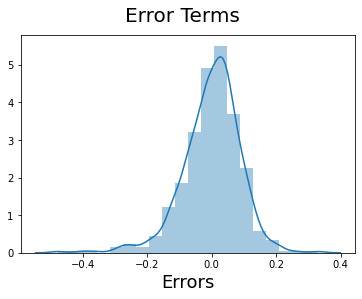

In [826]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

#### One of the assumptions of linear regression is error terms should be  normally distributed with mean 0 which is followed here.

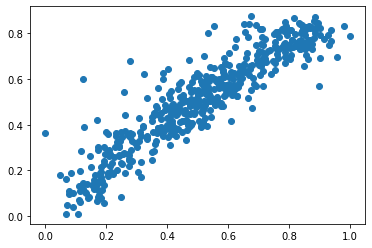

In [827]:
plt.scatter(y_train,y_train_pred)
plt.show()


#### Error terms have a constnt variance and doesnt follow any pattern,

### Making Predictions 

In [828]:

X_train_lm_1 = X_train_lm.drop(['const'], axis=1)
final_cols = X_train_lm_1.columns
final_cols

Index(['Year', 'Temparature', 'windspeed', 'season_spring', 'season_winter',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Nov',
       'Month_Sep', 'weekday_Mon', 'weekday_Tue', 'weathersit_Light Snow',
       'weathersit_Misty'],
      dtype='object')

In [829]:
# Applying scaling to test data
num_vars = ['Year','Temparature','Humidity','windspeed','Count']
scaler = MinMaxScaler()
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [830]:
df_test.describe()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.546312,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,0.059361,0.086758,...,0.963470,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.639269,0.027397,0.319635
std,0.500722,0.249189,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,0.236840,0.282125,...,0.188034,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.481313,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.759735,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [831]:
y_test = df_test.pop('Count')


In [832]:
X_test = df_test[final_cols]

In [833]:
X_test_lm = sm.add_constant(X_test)
X_test_lm

,const,Year,Temparature,windspeed,season_spring,season_winter,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Nov,Month_Sep,weekday_Mon,weekday_Tue,weathersit_Light Snow,weathersit_Misty
184,1.0,0.0,0.837241,0.149393,0,0,0,0,0,1,0,0,0,0,0,1
535,1.0,1.0,0.911423,0.231142,0,0,0,0,0,0,0,0,0,0,0,0
299,1.0,0.0,0.496221,0.443398,0,1,0,0,0,0,0,0,0,0,0,1
221,1.0,0.0,0.890387,0.449707,0,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0.0,0.821739,0.682387,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1.0,0.224955,0.388364,1,0,0,1,0,0,0,0,0,1,0,1
702,1.0,1.0,0.503971,0.383644,0,1,1,0,0,0,0,0,0,0,0,0
127,1.0,0.0,0.573725,0.132095,0,0,0,0,0,0,0,0,0,1,0,0
640,1.0,1.0,0.745342,0.111637,0,1,0,0,0,0,0,0,0,0,0,1


In [834]:

X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   Year                   219 non-null    float64
 2   Temparature            219 non-null    float64
 3   windspeed              219 non-null    float64
 4   season_spring          219 non-null    uint8  
 5   season_winter          219 non-null    uint8  
 6   Month_Dec              219 non-null    uint8  
 7   Month_Feb              219 non-null    uint8  
 8   Month_Jan              219 non-null    uint8  
 9   Month_Jul              219 non-null    uint8  
 10  Month_Nov              219 non-null    uint8  
 11  Month_Sep              219 non-null    uint8  
 12  weekday_Mon            219 non-null    uint8  
 13  weekday_Tue            219 non-null    uint8  
 14  weathersit_Light Snow  219 non-null    uint8  
 15  weath

In [835]:
# Making predictions.

y_pred_lm1 = lm.predict(X_test_lm)

Text(0, 0.5, 'y_pred_lm1')

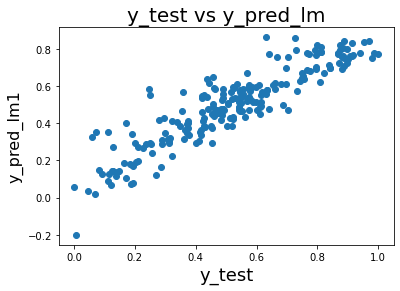

In [836]:
fig = plt.figure()
plt.scatter(y_test, y_pred_lm1)
plt.title('y_test vs y_pred_lm', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_lm1', fontsize = 16)  

In [837]:
from sklearn.metrics import mean_squared_error, r2_score
mse = np.sqrt(mean_squared_error(y_test,y_pred_lm1))
r_squared = r2_score(y_test,y_pred_lm1)
print('RMSE:',mse)
print('R-Square:',r_squared)


RMSE: 0.10333536974507776
R-Square: 0.8117328918008484


## Model 2: Building a linear model using RFE
     - y_train is the predictor variable, which is Count here
     - X_train is the independent variables
     - In this method Recursive feature selection is used to select the top 10 features which can predict the Bike 
        demands.Stats model is used on top of this to eliminate/add features based on significance and collinearity.

In [838]:
# Split the data into train_test split
df_train_1,df_test_1 = train_test_split(Bike_rent_data,train_size = 0.7,test_size = 0.3,random_state = 100)

In [839]:
df_train_1.shape

(510, 29)

In [840]:
df_test_1.shape

(219, 29)

In [841]:
df_train_1.head()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
653,2019,19.201653,55.8333,12.208807,7534,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
576,2019,29.246653,70.4167,11.083475,7216,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
426,2019,16.980847,62.1250,10.792293,4066,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
728,2019,10.489153,48.3333,23.500518,1796,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
482,2019,15.443347,48.9583,8.708325,4220,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [842]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    int64  
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   Count                  510 non-null    int64  
 5   season_spring          510 non-null    uint8  
 6   season_summer          510 non-null    uint8  
 7   season_winter          510 non-null    uint8  
 8   Month_Aug              510 non-null    uint8  
 9   Month_Dec              510 non-null    uint8  
 10  Month_Feb              510 non-null    uint8  
 11  Month_Jan              510 non-null    uint8  
 12  Month_Jul              510 non-null    uint8  
 13  Month_Jun              510 non-null    uint8  
 14  Month_Mar              510 non-null    uint8  
 15  Month

### Re-scaling

In [843]:
Bike_rent_data.describe()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,...,0.971233,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.690411,0.028767,0.336986
std,0.500343,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,...,0.167266,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.462641,0.167266,0.473004
min,2018.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.500000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2019.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [844]:
num_vars = ['Year','Temparature','Humidity','windspeed','Count']
scaler = MinMaxScaler()
df_train_1[num_vars] = scaler.fit_transform(df_train_1[num_vars])

In [845]:
df_train_1.describe()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,...,0.974510,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.343137
std,0.500429,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,...,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building.
     - y_train is the predictor variable, which is Count here
     - X_train is the independent variables

In [846]:
y_train_1 = df_train_1.pop('Count')
X_train_1 = df_train_1

In [847]:
y_train_1.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: Count, dtype: float64

In [848]:
X_train_1.head()

,Year,Temparature,Humidity,windspeed,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,Month_Feb,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
653,1.0,0.509887,0.575354,0.300794,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
576,1.0,0.815169,0.725633,0.264686,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
426,1.0,0.442393,0.640189,0.255342,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
728,1.0,0.245101,0.498067,0.663106,1,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
482,1.0,0.395666,0.504508,0.188475,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [849]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [850]:
# Running RFE with the output number of the variable equal to 10
lm_model = LinearRegression()
lm_model.fit(X_train_1, y_train_1)

rfe = RFE(lm_model, 10)             # running RFE
rfe = rfe.fit(X_train_1, y_train_1)

In [851]:
list(zip(X_train_1.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Temparature', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('Month_Aug', False, 14),
 ('Month_Dec', False, 6),
 ('Month_Feb', False, 7),
 ('Month_Jan', False, 4),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 18),
 ('Month_Mar', False, 19),
 ('Month_May', False, 11),
 ('Month_Nov', False, 5),
 ('Month_Oct', False, 16),
 ('Month_Sep', True, 1),
 ('holiday_NHday', True, 1),
 ('weekday_Mon', False, 13),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 17),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 15),
 ('workingday_Wday', False, 8),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Misty', False, 2)]

In [852]:
col = X_train_1.columns[rfe.support_]
col

Index(['Year', 'Temparature', 'Humidity', 'windspeed', 'season_spring',
       'season_winter', 'Month_Jul', 'Month_Sep', 'holiday_NHday',
       'weathersit_Light Snow'],
      dtype='object')

In [853]:
X_train_1.columns[~rfe.support_]

Index(['season_summer', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan',
       'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_Wday', 'weathersit_Misty'],
      dtype='object')

In [854]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   Month_Aug              510 non-null    uint8  
 8   Month_Dec              510 non-null    uint8  
 9   Month_Feb              510 non-null    uint8  
 10  Month_Jan              510 non-null    uint8  
 11  Month_Jul              510 non-null    uint8  
 12  Month_Jun              510 non-null    uint8  
 13  Month_Mar              510 non-null    uint8  
 14  Month_May              510 non-null    uint8  
 15  Month

#### Building model using statsmodel, for the detailed statistics

In [855]:
# Creating predictor variables dataframe with RFE selected variables
X_train_rfe = X_train_1[col]

In [856]:
X_train_rfe.head()

,Year,Temparature,Humidity,windspeed,season_spring,season_winter,Month_Jul,Month_Sep,holiday_NHday,weathersit_Light Snow
653,1.0,0.509887,0.575354,0.300794,0,1,0,0,1,0
576,1.0,0.815169,0.725633,0.264686,0,0,1,0,1,0
426,1.0,0.442393,0.640189,0.255342,1,0,0,0,1,0
728,1.0,0.245101,0.498067,0.663106,1,0,0,0,1,0
482,1.0,0.395666,0.504508,0.188475,0,0,0,0,1,0


In [857]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,Year,Temparature,Humidity,windspeed,season_spring,season_winter,Month_Jul,Month_Sep,holiday_NHday,weathersit_Light Snow
653,1.0,1.0,0.509887,0.575354,0.300794,0,1,0,0,1,0
576,1.0,1.0,0.815169,0.725633,0.264686,0,0,1,0,1,0
426,1.0,1.0,0.442393,0.640189,0.255342,1,0,0,0,1,0
728,1.0,1.0,0.245101,0.498067,0.663106,1,0,0,0,1,0
482,1.0,1.0,0.395666,0.504508,0.188475,0,0,0,0,1,0


In [858]:
lm_model = sm.OLS(y_train_1,X_train_rfe).fit()

In [859]:
lm_model.params

const                    0.284947
Year                     0.228051
Temparature              0.514674
Humidity                -0.272807
windspeed               -0.188675
season_spring           -0.100531
season_winter            0.065282
Month_Jul               -0.080549
Month_Sep                0.059762
holiday_NHday            0.092000
weathersit_Light Snow   -0.197972
dtype: float64

In [860]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.53e-184
Time:                        17:48:24   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

#### R-Sqaure is 83%, which is good.P-values for co-efficients are < 0.05. Check multicollinearity

In [861]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [862]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,holiday_NHday,23.54
2,Humidity,20.18
1,Temparature,15.52
3,windspeed,4.50
4,season_spring,2.69
0,Year,2.07
5,season_winter,2.05
6,Month_Jul,1.40
7,Month_Sep,1.20
9,weathersit_Light Snow,1.12


####  VIF of humidity is very high. VIF can affect the co-efficients of the variables hence lets drop humidity and rebuild the model again.

In [863]:
X_train_rfe = X_train_rfe.drop(['holiday_NHday'], axis=1)
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   510 non-null    float64
 1   Temparature            510 non-null    float64
 2   Humidity               510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_winter          510 non-null    uint8  
 6   Month_Jul              510 non-null    uint8  
 7   Month_Sep              510 non-null    uint8  
 8   weathersit_Light Snow  510 non-null    uint8  
dtypes: float64(4), uint8(5)
memory usage: 22.4 KB


In [864]:
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,Year,Temparature,Humidity,windspeed,season_spring,season_winter,Month_Jul,Month_Sep,weathersit_Light Snow
653,1.0,1.0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1.0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1.0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1.0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1.0,0.395666,0.504508,0.188475,0,0,0,0,0


In [865]:
lm_model = sm.OLS(y_train_1,X_train_rfe).fit()
lm_model.params

const                    0.374561
Year                     0.228478
Temparature              0.514388
Humidity                -0.269942
windspeed               -0.189775
season_spring           -0.103320
season_winter            0.062371
Month_Jul               -0.079704
Month_Sep                0.056344
weathersit_Light Snow   -0.195270
dtype: float64

In [866]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.46e-183
Time:                        17:48:26   Log-Likelihood:                 483.60
No. Observations:                 510   AIC:                            -947.2
Df Residuals:                     500   BIC:                            -904.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

#### There is a slight decrease in the R-Square value. P-Values are < 0.05

In [867]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [868]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Humidity,15.17
1,Temparature,13.09
3,windspeed,4.02
4,season_spring,2.38
0,Year,2.06
5,season_winter,1.97
6,Month_Jul,1.40
7,Month_Sep,1.20
8,weathersit_Light Snow,1.11


#### P-value is < 0.05 but humidity has a very high VIF hence dropping humidity and rebuild model

In [869]:
X_train_rfe = X_train_rfe.drop(['Humidity'], axis=1)

In [870]:
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,Year,Temparature,windspeed,season_spring,season_winter,Month_Jul,Month_Sep,weathersit_Light Snow
653,1.0,1.0,0.509887,0.300794,0,1,0,0,0
576,1.0,1.0,0.815169,0.264686,0,0,1,0,0
426,1.0,1.0,0.442393,0.255342,1,0,0,0,0
728,1.0,1.0,0.245101,0.663106,1,0,0,0,0
482,1.0,1.0,0.395666,0.188475,0,0,0,0,0


In [871]:
lm_model = sm.OLS(y_train_1,X_train_rfe).fit()
lm_model.params
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.12e-170
Time:                        17:48:28   Log-Likelihood:                 450.22
No. Observations:                 510   AIC:                            -882.4
Df Residuals:                     501   BIC:                            -844.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2036      0.025      8.009      0.000       0.154       0.254
Year                      0.2353      0.009     26.059      0.000       0.218       0.253
Temparature               0.4759      0.033     14.339      0.000       0.411       0.541
windspeed                -0.1341      0.027     -4.898      0.000      -0.188      -0.080
season_spring            -0.1058      0.017     -6.388      0.000      -0.138      -0.073
season_winter             0.0478      0.014      3.540      0.000       0.021       0.074
Month_Jul                -0.0610      0.019     -3.214      0.001      -0.098      -0.024
Month_Sep                 0.0467      0.017      2.712      0.007       0.013       0.081
weathersit_Light Snow    -0.2531      0.027     -9.421      0.000      -0.306      -0.200
==============================================================================
Omnibus:                       66.514   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.912
Skew:                          -0.762   Prob(JB):                     2.76e-28
Kurtosis:                       4.911   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [872]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temparature,4.40
2,windspeed,3.98
0,Year,2.06
3,season_spring,1.60
4,season_winter,1.36
5,Month_Jul,1.34
6,Month_Sep,1.19
7,weathersit_Light Snow,1.06


#### All p-values are < 0.05 and also VIF is less than 5.
#### R-Square is 80% and adjusted R-Sqaure is close to R-SQuare with .798.
#### Probability of F-stats is also less.

### Residual Analysis of the train data

In [873]:
features = X_train_rfe.columns
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred_1 = lm_model.predict(X_train_rfe)

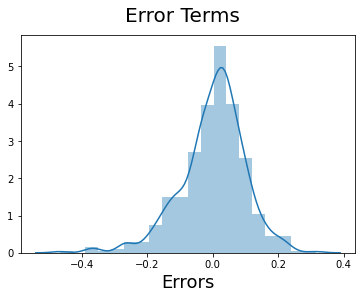

In [874]:
fig = plt.figure()
sns.distplot((y_train_1 - y_train_pred_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

#### Error terms are  normally distributed with mean 0

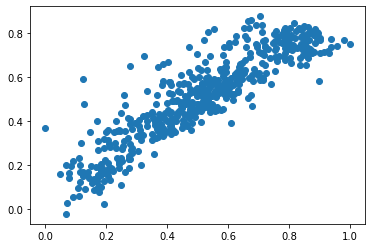

In [875]:
plt.scatter(y_train_1,y_train_pred_1)
plt.show()


### Making Predictions Using the Final Model

In [876]:
# Applying scaling to test data
num_vars = ['Year','Temparature','Humidity','windspeed','Count']
scaler = MinMaxScaler()
df_test_1[num_vars] = scaler.fit_transform(df_test_1[num_vars])


In [877]:
df_test_1.describe()

,Year,Temparature,Humidity,windspeed,Count,season_spring,season_summer,season_winter,Month_Aug,Month_Dec,...,holiday_NHday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Wday,weathersit_Light Snow,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.546312,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,0.059361,0.086758,...,0.963470,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.639269,0.027397,0.319635
std,0.500722,0.249189,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,0.236840,0.282125,...,0.188034,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.481313,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.759735,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [878]:
features

Index(['Year', 'Temparature', 'windspeed', 'season_spring', 'season_winter',
       'Month_Jul', 'Month_Sep', 'weathersit_Light Snow'],
      dtype='object')

In [879]:
y_test_1 = df_test_1.pop('Count')

In [880]:
# predictor variables
X_test_1 = df_test_1[features]
X_test_1.head()

,Year,Temparature,windspeed,season_spring,season_winter,Month_Jul,Month_Sep,weathersit_Light Snow
184,0.0,0.837241,0.149393,0,0,1,0,0
535,1.0,0.911423,0.231142,0,0,0,0,0
299,0.0,0.496221,0.443398,0,1,0,0,0
221,0.0,0.890387,0.449707,0,0,0,0,0
152,0.0,0.821739,0.682387,0,0,0,0,0


In [881]:
X_test_rfe = sm.add_constant(X_test_1)
X_test_rfe

,const,Year,Temparature,windspeed,season_spring,season_winter,Month_Jul,Month_Sep,weathersit_Light Snow
184,1.0,0.0,0.837241,0.149393,0,0,1,0,0
535,1.0,1.0,0.911423,0.231142,0,0,0,0,0
299,1.0,0.0,0.496221,0.443398,0,1,0,0,0
221,1.0,0.0,0.890387,0.449707,0,0,0,0,0
152,1.0,0.0,0.821739,0.682387,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
400,1.0,1.0,0.224955,0.388364,1,0,0,0,0
702,1.0,1.0,0.503971,0.383644,0,1,0,0,0
127,1.0,0.0,0.573725,0.132095,0,0,0,0,0
640,1.0,1.0,0.745342,0.111637,0,1,0,0,0


In [882]:
# Making predictions.

y_pred_lm_1 = lm_model.predict(X_test_rfe)


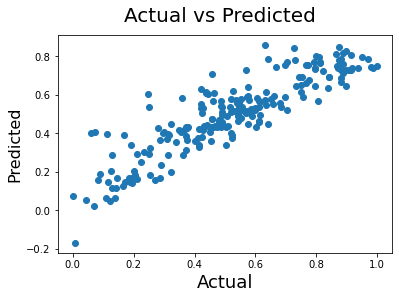

In [883]:
fig = plt.figure()
plt.scatter(y_test_1, y_pred_lm_1)
fig.suptitle('Actual vs Predicted', fontsize = 20)              # Plot heading 
plt.xlabel('Actual', fontsize = 18)                          # X-label
plt.ylabel('Predicted', fontsize = 16)  
plt.show()

In [884]:
from sklearn.metrics import mean_squared_error, r2_score
mse = np.sqrt(mean_squared_error(y_test_1,y_pred_lm_1))
r_squared = r2_score(y_test_1,y_pred_lm_1)
print('RMSE:',mse)
print('R-Square:',r_squared)

RMSE: 0.11320890113882041
R-Square: 0.7740368573402122


## Comparing model 1 and 2

####  RMSE and R-Square of model 1:
RMSE: 0.10333536974507776
R-Square: 0.8117328918008484
####  RMSE and R-Square of model 2:
RMSE: 0.11320890113882041
R-Square: 0.7740368573402122

### First model has low RMSE and High R-Square compared to model 2. Hence concluding model 1 as the best among the 2.
